In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
from kan import KAN, create_dataset
import sympy as sp

In [2]:
f = lambda x: x[:,[0]] * x[:,[1]]
dataset = create_dataset(f, n_var=2,ranges = [-4,4])

In [3]:
grids = np.array([5,10])

train_losses = []
test_losses = []
steps = 50
k = 2

for i in range(grids.shape[0]):
    if i == 0:
        model = KAN(width=[2,2,1], grid=grids[i], k=k)  
    if i != 0:
        model = KAN(width=[2,2,1], grid=grids[i], k=k).initialize_from_another_model(model, dataset['train_input'])
    results = model.train(dataset, opt="LBFGS", steps=steps, stop_grid_update_step=30,lamb=0.01)
    train_losses += results['train_loss']
    test_losses += results['test_loss']

train loss: 2.26e-01 | test loss: 2.43e-01 | reg: 9.75e+00 : 100%|██| 50/50 [00:25<00:00,  1.99it/s]
train loss: 1.10e-01 | test loss: 1.17e-01 | reg: 1.08e+01 : 100%|██| 50/50 [00:19<00:00,  2.62it/s]


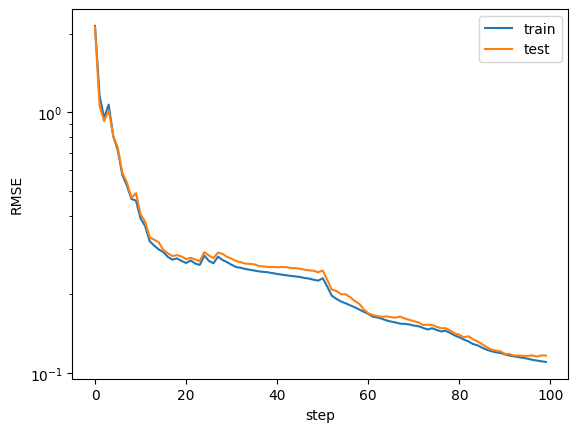

In [4]:
plt.plot(train_losses)
plt.plot(test_losses)
plt.legend(['train', 'test'])
plt.ylabel('RMSE')
plt.xlabel('step')
plt.yscale('log')

In [5]:
lossnext=model.train(dataset, opt="LBFGS", steps=100)

train loss: 6.84e-02 | test loss: 7.06e-02 | reg: 1.17e+01 : 100%|█| 100/100 [00:56<00:00,  1.77it/s


r2 is 0.9998723268508911
r2 is 0.7989192008972168
r2 is not very high, please double check if you are choosing the correct symbolic function.
Best value at boundary.
r2 is 0.9999042749404907
r2 is 0.9296501278877258


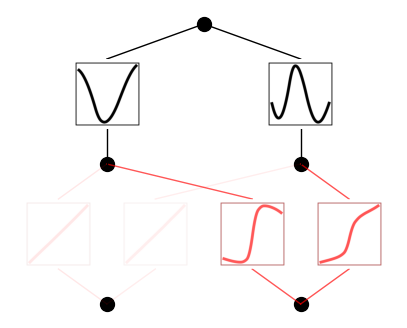

In [6]:
model(dataset['train_input'])
model.fix_symbolic(0, 0, 0, 'x')
model.fix_symbolic(0, 1, 0, 'x')
model.fix_symbolic(0, 0, 1, 'x^2')
model.fix_symbolic(0, 1, 1, 'x^2')
model.plot()

In [7]:
lib = ['x', 'x^2']
model.auto_symbolic(lib=lib)
# model.auto_symbolic()

skipping (0,0,0) since already symbolic
skipping (0,0,1) since already symbolic
skipping (0,1,0) since already symbolic
skipping (0,1,1) since already symbolic
fixing (1,0,0) with x^2, r2=0.9083362817764282
fixing (1,1,0) with x^2, r2=0.357638418674469


In [8]:
loss=model.train(dataset, opt="LBFGS", steps=50)

train loss: 5.72e-02 | test loss: 5.55e-02 | reg: 9.42e+00 : 100%|██| 50/50 [00:19<00:00,  2.51it/s]


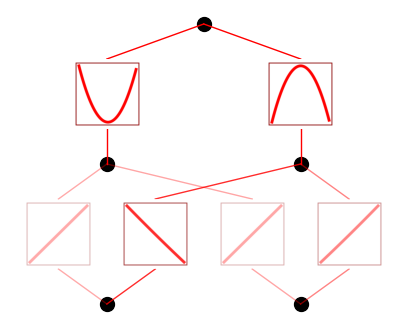

In [9]:
model.prune(0.05)
model.plot()

In [10]:
model.symbolic_formula()[0][0].expand()

-5.62808e-6*x_1**4 + 0.00225231*x_1**3 - 1.08398e-5*x_1**2*x_2**2 - 0.0021629*x_1**2*x_2 + 0.0246456*x_1**2 + 0.00216978*x_1*x_2**2 + 0.923337*x_1*x_2 - 5.22511e-6*x_2**4 - 0.00208381*x_2**3 + 0.0320457*x_2**2